<a href="https://colab.research.google.com/github/hoops92/DS-Unit-2-Applied-Modeling/blob/master/module1-define-ml-problems/LS_DS_231.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Lambda School Data Science

Unit 2, Sprint 3, Module 1

Define ML problems
You will use your portfolio project dataset for all assignments this sprint.

Assignment
Complete these tasks for your project, and document your decisions.

[ ] Choose your target. Which column in your tabular dataset will you predict?
[ ] Is your problem regression or classification?
[ ] How is your target distributed?
Classification: How many classes? Are the classes imbalanced?
Regression: Is the target right-skewed? If so, you may want to log transform the target.
[ ] Choose your evaluation metric(s).
Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
[ ] Choose which observations you will use to train, validate, and test your model.
Are some observations outliers? Will you exclude them?
Will you do a random split or a time-based split?
[ ] Begin to clean and explore your data.
[ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?
If you haven't found a dataset yet, do that today. Review requirements for your portfolio project and choose your dataset.

Some students worry, what if my model isn't “good”? Then, produce a detailed tribute to your wrongness. That is science!

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install -U pandas-profiling category_encoders

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [2]:
import pandas as pd
df = pd.read_csv(DATA_PATH+'burritos/burritos.csv')
df.shape

(423, 66)

In [3]:
from google.colab.data_table import DataTable
DataTable(df, max_columns=66, include_index=False)

In [4]:
df['overall'].describe()

count    421.000000
mean       3.620887
std        0.755718
min        1.000000
25%        3.100000
50%        3.800000
75%        4.100000
max        5.000000
Name: overall, dtype: float64

In [5]:
df['overall'].value_counts()

4.00000    74
3.50000    46
3.00000    39
4.20000    24
4.50000    24
2.00000    19
3.90000    17
3.80000    15
3.70000    15
4.10000    12
5.00000    11
3.20000    11
2.50000     9
3.60000     9
4.25000     8
4.30000     7
4.80000     7
3.75000     6
3.10000     6
2.60000     6
2.80000     5
2.20000     4
2.70000     4
3.30000     4
4.70000     4
4.40000     4
1.50000     4
4.60000     4
2.90000     4
4.90000     3
3.40000     3
2.40000     2
2.75000     2
1.80000     2
3.25000     2
2.30000     2
2.66000     1
3.33333     1
1.00000     1
Name: overall, dtype: int64

In [6]:
df['overall'] >= 4.0

0      False
1      False
2      False
3      False
4       True
       ...  
418    False
419     True
420    False
421     True
422     True
Name: overall, Length: 423, dtype: bool

In [0]:
# Derive binary classification target
# We define a 'Great' burrito as having an
# overall rating of 4 or higher, on a 5 point scale.
# Drop unrated burritos

df = df.dropna(subset=['overall']).copy()
df['Great'] = df['overall'] >= 4

In [0]:
y = df['Great']

In [9]:
y.nunique()

2

In [10]:
y.value_counts(normalize=True)

False    0.567696
True     0.432304
Name: Great, dtype: float64

In [11]:
y.value_counts(normalize=True).max()

0.5676959619952494

In [12]:
df['Burrito'].value_counts()

California                  101
Carne asada                  29
California                   26
Carnitas                     23
Local                        14
                           ... 
Barbacoa                      1
Colimas burrito               1
Tilapia one                   1
Azteca                        1
California Surf and Turf      1
Name: Burrito, Length: 132, dtype: int64

In [13]:
df['Burrito'].nunique()

132

In [14]:
df['Burrito'].unique()

array(['California ', 'Carnitas', 'Carne asada', 'California',
       'combo chicken', 'Monster California', 'Carne Asada',
       'Surf & Turf', 'Chile verde pork', 'battered fish ',
       'Surf and turf ', 'Adobada ', 'Barbacoa', '2 in 1', 'Adobado',
       'Shredded beef', 'Hawaiian', 'Bandido', 'Campeon', 'carne asada',
       'California chicken', 'Azteca', 'Lobster', 'Al pastor', 'Custom',
       'Machaca', 'Quesaburro', 'Philly ', 'Quesa', 'Surf and turf',
       'Mahi', 'Addiction', 'Oaxacalifornia', "Deborah's special",
       'Chicken nopalito', 'Adobada', 'Chicken', 'California Everything',
       'Chile relleno and carnitas', 'California (only cheese)', 'Fish',
       'Chimichanga beef', 'Pastor', 'El Hawaiiano ', 'Shrimp',
       'El Rusio', 'Bacon breakfast', 'Chile Relleno', 'Bomb', 'Arizona',
       'California Burrito', '619 Burrito Original', 'Chicken asada',
       'Carne adobada ', 'Bean and cheese', 'Pokirrito classic ',
       'Mauna Lani', 'Especial ', 'Ranchero

In [0]:
df['Burrito'] = df['Burrito'].str.lower()

In [0]:
california = df['Burrito'].str.contains('california')
asada = df['Burrito'].str.contains('asada')
surf = df['Burrito'].str.contains('surf')
carnitas = df['Burrito'].str.contains('carnitas')

In [0]:
df.loc[california, 'Burrito'] = 'California'
df.loc[asada, 'Burrito'] = 'Asada'
df.loc[surf, 'Burrito'] = 'Surf & Turf'
df.loc[carnitas, 'Burrito'] = 'Carnitas'
df.loc[~california & ~asada & ~surf & ~carnitas, 'Burrito'] = 'Other'

In [0]:
df = df.drop(columns=['Notes', 'Location', 'Reviewer', 'Address', 'URL', 'Neighborhood'])

In [0]:
df = df.fillna('Missing')

In [0]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, errors='coerce')

In [21]:
train = df[df['Date'].dt.year <= 2016]
val = df[df['Date'].dt.year == 2017]
test = df[df['Date'].dt.year >= 2018]

train.shape, val.shape, test.shape

((298, 61), (85, 61), (38, 61))

In [22]:
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

target = 'Great'
features = df.columns.drop([target, 'Date'])

X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    DecisionTreeClassifier(max_depth=3)
)

pipeline.fit(X_train, y_train)
print('Accuracy:', pipeline.score(X_val, y_val))

Accuracy: 1.0


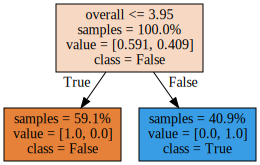

In [23]:
# Visualize decision tree
import graphviz
from sklearn.tree import export_graphviz

tree = pipeline.named_steps['decisiontreeclassifier']

dot_data = export_graphviz(
    tree, 
    out_file=None, 
    feature_names=X_train.columns, 
    class_names=y.unique().astype(str), 
    filled=True, 
    impurity=False,
    proportion=True
)

graphviz.Source(dot_data)

In [0]:
# Drop feature with "leakage"
df = df.drop(columns=['overall'])

In [25]:
target = 'Great'
features = df.columns.drop([target, 'Date'])
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    DecisionTreeClassifier(max_depth=3)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.8


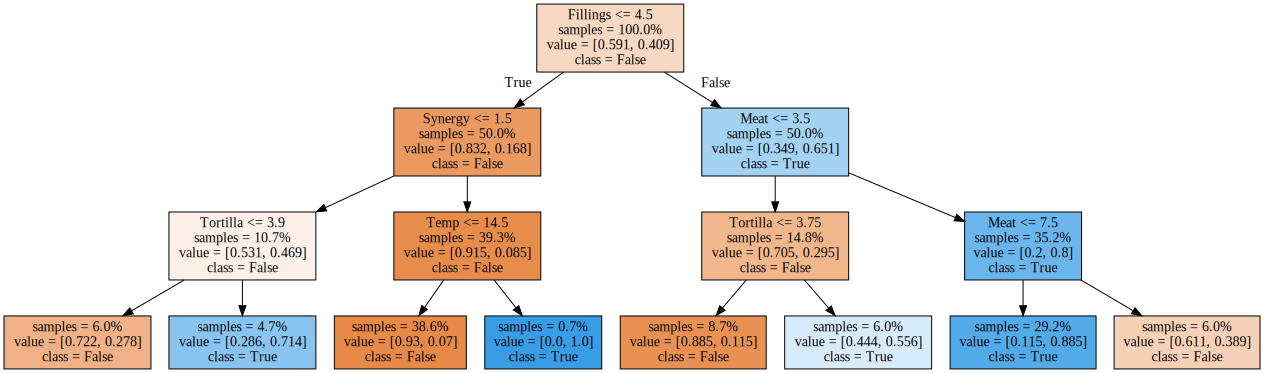

In [26]:
# Visualize decision tree
import graphviz
from sklearn.tree import export_graphviz

tree = pipeline.named_steps['decisiontreeclassifier']

dot_data = export_graphviz(
    tree, 
    out_file=None, 
    feature_names=X_train.columns, 
    class_names=y.unique().astype(str), 
    filled=True, 
    impurity=False,
    proportion=True
)

graphviz.Source(dot_data)

In [0]:
# "The ROC curve is created by plotting the true positive rate (TPR)
# against the false positive (FPR)
# at various threshold settings."

# Use scikit-learn to calculate TPR & FPT at various thresholds
from sklearn.metrics import roc_curve
y_pred_proba = pipeline.predict_proba(X_val)[:, -1] # Probability for the last class
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

In [28]:
# See the results in a table
pd.DataFrame({
    'False Positive Rate': fpr, 
    'True Positive Rate': tpr, 
    'Threshold': thresholds
})

False Positive Rate  True Positive Rate  Threshold
0             0.000000            0.000000   1.885057
1             0.021277            0.605263   0.885057
2             0.106383            0.657895   0.714286
3             0.127660            0.710526   0.555556
4             0.148936            0.736842   0.388889
5             0.255319            0.789474   0.277778
6             0.276596            0.842105   0.115385
7             1.000000            1.000000   0.069565

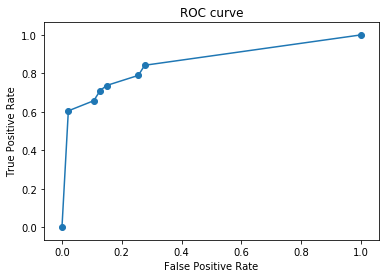

In [29]:
# See the results on a plot.
# This is the "Receiver Operating Characteristic curve"
import matplotlib.pyplot as plt
plt.scatter(fpr, tpr)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

In [30]:
# Use scikit-learn to calculate the area under the curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred_proba)

0.8549832026875699

In [0]:
# Read New York City apartment rental listing data
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [0]:
y = df['price']

In [33]:
import seaborn as sns
sns.distplot(y);

In [34]:
y.describe()

count    4.935200e+04
mean     3.830174e+03
std      2.206687e+04
min      4.300000e+01
25%      2.500000e+03
50%      3.150000e+03
75%      4.100000e+03
max      4.490000e+06
Name: price, dtype: float64

In [0]:
# yes, there are outliers
# some prices are so high or low it doesn't make sense
# some locatins that aren't even in New York City

In [0]:
# remove the most extreme 1% prices
# remove the most extreme .1% latitude and longitude

import numpy as np
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
        (df['price'] <= np.percentile(df['price'], 99.5)) & 
        (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
        (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
        (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
        (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

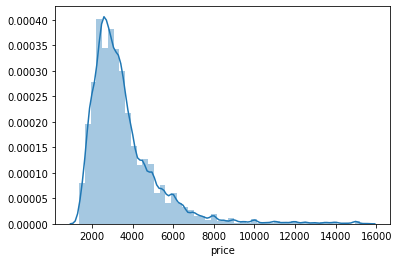

In [37]:
y = df['price']
sns.distplot(y);

In [38]:
y.describe()

count    48817.000000
mean      3579.585247
std       1762.430772
min       1375.000000
25%       2500.000000
50%       3150.000000
75%       4095.000000
max      15500.000000
Name: price, dtype: float64

In [0]:
import numpy as np

y_log = np.log1p(y)

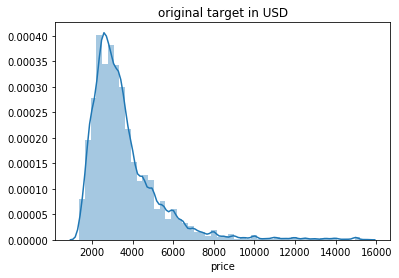

In [40]:
sns.distplot(y)
plt.title('original target in USD')
plt.show()

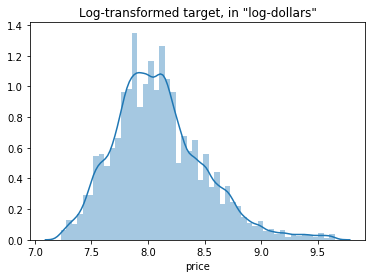

In [41]:
sns.distplot(y_log)
plt.title('Log-transformed target, in "log-dollars"')
plt.show()